## European Restaurant Reviews
Reviews of various European restaurants by customers.
This dataset contains customer reviews for various restaurants, divided into positive and negative sentiments. Reviews are crucial for each restaurant’s reputation and are updated daily.

https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 160)

# Natural Language Processing (NLP)
import nltk
from wordcloud import WordCloud
#nltk.download('wordnet')

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
print(os.getcwd())

C:\Users\HENNY PURWADI\PYTHON\FT_Embed\FineTune_Embed


In [5]:
# Read CSV file
df = pd.read_csv('./data/EuropeanRestaurantReviews.csv')
df.head(2)

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the carbonara was not good. She was rude. It was a very bad experience. The worst in Rome in many years.
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20 minutes they brough..."


In [7]:
len(df)

1502

In [9]:
df.columns

Index(['Country', 'Restaurant Name', 'Sentiment', 'Review Title',
       'Review Date', 'Review'],
      dtype='object')

In [11]:
df = df.rename(columns={'Review Title': 'ReviewTitle'})
df = df.rename(columns={'Restaurant Name': 'RestaurantName'})
df = df.rename(columns={'Review Date': 'ReviewDate'})

In [13]:
# Map sentiment labels to numerical values
df['Label'] = df['Sentiment'].map({'Positive': 1,'Negative': 0,})
df.iloc[128:132]

,Country,RestaurantName,Sentiment,ReviewTitle,ReviewDate,Review,Label
128,France,The Frog at Bercy Village,Negative,Overrated and touristy,Mar 2024 •,Unfortunately the food was just average. No dish was really convincing. The greeting from the kitchen was okay but not a highlight in terms of taste.\n\nThe...,0
129,France,The Frog at Bercy Village,Negative,Bad tasting food difficult to digest,Oct 2023 •,We didn't like the food that much.\n\nThe starters were tasteless\n\nand hard to digest.\n\nThe pasta was nothing special.\n\nThe main course was cooked for...,0
130,France,The Frog at Bercy Village,Negative,Pretty dissappointing.,Feb 2022 •,"I actually never write reviews for the restaurants, but for this one i just had to. The reason we decided to check this place out was only because of high r...",0
131,France,The Frog at Bercy Village,Negative,Sorry,Feb 2012 •,I'm afraid we were very let down by this restaurant.\nWe were left standing at the door for 5 minutes before being seated. We decided on the tasting menu fo...,0


In [15]:
# Combine the ReviewTitle and Review columns into a single 'combined' column
df["Combined"] = (df.ReviewTitle.str.strip() + df.Review.str.strip())
df.head(2)

,Country,RestaurantName,Sentiment,ReviewTitle,ReviewDate,Review,Label,Combined
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the carbonara was not good. She was rude. It was a very bad experience. The worst in Rome in many years.,0,Rude managerThe manager became agressive when I said the carbonara was not good. She was rude. It was a very bad experience. The worst in Rome in many years.
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20 minutes they brough...",0,"A big disappointmentI ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20..."


In [17]:
# Select the necessary columns
df = df[["Sentiment", "Label","Combined"]]
df = df.rename(columns={'Combined': 'Review'})

# Save the DataFrame to a CSV file
df.to_csv('./data/Reviews.csv', index=False)

In [19]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./data/Reviews.csv')

# Display the first few rows of the DataFrame
df.head(2)

,Sentiment,Label,Review
0,Negative,0,Rude managerThe manager became agressive when I said the carbonara was not good. She was rude. It was a very bad experience. The worst in Rome in many years.
1,Negative,0,"A big disappointmentI ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20..."


In [21]:
df.columns

Index(['Sentiment', 'Label', 'Review'], dtype='object')

In [23]:
print(df.dtypes)

Sentiment    object
Label         int64
Review       object
dtype: object


In [25]:
#Check all missing value in dataset
df_missing_values= df.isnull().sum()
df_missing_values

Sentiment    0
Label        0
Review       0
dtype: int64

In [27]:
df.duplicated().sum()

76

In [29]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [31]:
#Find unique values in df['Sentiment'] 
unique_Sentiment= df['Sentiment'] .unique()
print(unique_Sentiment)

['Negative' 'Positive']


In [33]:
df_Sentiment_counts = df['Sentiment'].value_counts()
df_Sentiment_counts

Sentiment
Positive    1237
Negative     189
Name: count, dtype: int64

### There is an imbalanced dataset of sentiments between Positive and Negative

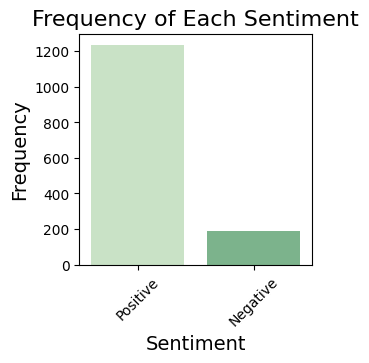

In [38]:
#Plot Sentiment
plt.figure(figsize=(3, 3))
sns.barplot(x=df_Sentiment_counts.index, y=df_Sentiment_counts.values, palette='Greens',alpha=0.7)
plt.title('Frequency of Each Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

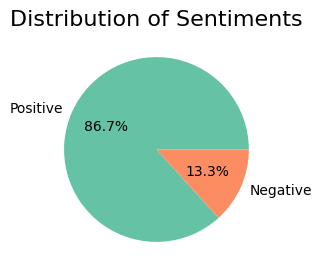

In [40]:
plt.figure(figsize=(3, 3))
plt.pie(df_Sentiment_counts, labels=df_Sentiment_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of Sentiments', fontsize=16)
plt.show()

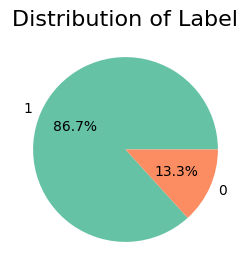

In [42]:
df_Label_counts = df['Label'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(df_Sentiment_counts, labels=df_Label_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of Label', fontsize=16)
plt.show()

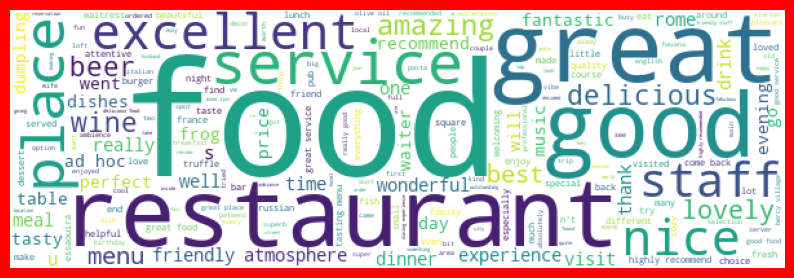

In [44]:
# Plotting the word cloud of Positive Review Title

pos_words = ""
# Loop all texts where Sentiment is 'Positive'
for value in df[df['Sentiment'] == 'Positive'].Review:
    lowercase_text = value.lower()
    tokens = nltk.word_tokenize(lowercase_text)
    for word in tokens:
        pos_words = pos_words + word + ' '

pos_wordcloud = WordCloud(background_color="White", width=600, height=200).generate(pos_words)

# Plot the word cloud 
plt.figure( figsize=(10,10), facecolor='r')
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.show()